# II Programming and Critical Analysis

## Setup

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load Data

In [17]:
parkinsons = pd.read_csv("Parkinsons data.csv")

In [18]:
parkinsons.head(3)

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,target
0,0.815695,-0.682509,-1.632090,0.082905,-0.284242,0.327453,-0.028637,0.328505,-0.324594,-0.351642,-0.209709,-0.423356,-0.543466,-0.209704,-0.298721,-0.009205,-1.214066,-1.478500,-0.650658,34.398
1,0.815695,-0.682509,-1.500676,-0.560793,-0.756723,-0.533746,-0.476212,-0.534825,-0.534016,-0.573156,-0.545158,-0.565592,-0.529955,-0.545153,-0.351965,1.282650,-1.055119,-1.247880,-1.218585,34.894
2,0.815695,-0.682509,-1.369410,-0.238944,-0.539382,-0.300038,-0.320767,-0.298983,-0.669115,-0.564469,-0.741592,-0.702426,-0.645545,-0.741587,-0.199370,0.318711,-0.784860,-1.540139,-0.103280,35.389


## Separate Labels

In [26]:
type(parkinsons)

pandas.core.frame.DataFrame

In [29]:
y = parkinsons["target"]
X = parkinsons.drop("target", axis=1)

## 5

### Split dataset

In [48]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

In [49]:
linear_maes = []
mlp_no_activation_maes = []
mlp_relu_maes = []

In [51]:
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    lr = LinearRegression()
    lr_mae = train_and_evaluate(lr, X_train, X_test, y_train, y_test)
    linear_maes.append(lr_mae)
    
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation_mae = train_and_evaluate(mlp_no_activation, X_train, X_test, y_train, y_test)
    mlp_no_activation_maes.append(mlp_no_activation_mae)
    
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu_mae = train_and_evaluate(mlp_relu, X_train, X_test, y_train, y_test)
    mlp_relu_maes.append(mlp_relu_mae)

/Users/irellzane/anaconda3/envs/irellenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/irellzane/anaconda3/envs/irellenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/irellzane/anaconda3/envs/irellenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/irellzane/anaconda3/envs/irellenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

/var/folders/rm/w0ct617n0y1_09qpsz1krsf80000gn/T/ipykernel_25561/3422503996.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([linear_maes, mlp_no_activation_maes, mlp_relu_maes],


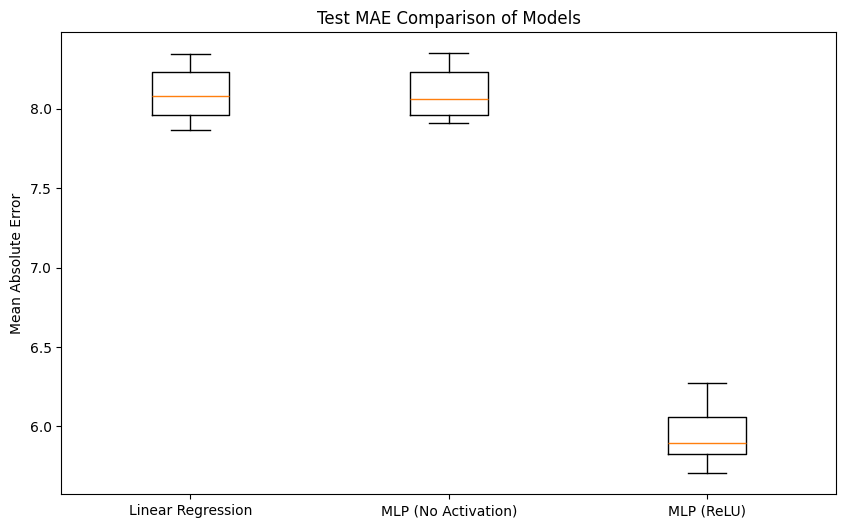

In [52]:
plt.figure(figsize=(10, 6))
plt.boxplot([linear_maes, mlp_no_activation_maes, mlp_relu_maes], 
            labels=['Linear Regression', 'MLP (No Activation)', 'MLP (ReLU)'])
plt.title('Test MAE Comparison of Models')
plt.ylabel('Mean Absolute Error')
plt.show()